# Verdadera Democracia

*   Francisco
*   Yeira Liseth Rodríguez Rodríguez

A continuación se presenta el segundo ejercicio del capítulo 3 de la materia de Inteligencia Artificial y mini-robots

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


#### 1. Parámetros iniciales y librerías
Se definen 5 partidos políticos, 50 entidades (ej. regiones o departamentos), una población de 100 individuos (soluciones), con probabilidades de cruce de 60% y de mutación: 5%, con 100 generaciones.

In [2]:
num_partidos = 5
num_entidades = 48
tam_poblacion = 100


# Parámetros del algoritmo
generaciones = 100
prob_cruce = 0.6
prob_mutacion = 0.05

print("Algoritmo genético con \n- {}% de cruce\n- {}% mutacion".format(prob_cruce * 100, prob_mutacion * 100))

Algoritmo genético con 
- 60.0% de cruce
- 5.0% mutacion


#### 2. Clase individuo
Se genera aleatoriamente si no se proporciona y en donde el genoma es un arreglo de 50 elementos donde cada posición representa una curul y su valor (de 0 a 4) representa el partido al que pertenece.
Posee dos métodos:
*   Cruzar: donde se hace el cruce de dos padres (representados como vectores) y devuelve dos hijos con genes combinado
*   Mutar: Se aplica mutación gen por gen donde cada curul tiene probabilidad de cambiar de partido




In [3]:
class Individuo:
    """
        El individudo es la distribucion de las curules :D
    """
    def __init__(self, num_partidos, num_curules, genome = None):
        self.num_curules = num_curules
        self.num_partidos = num_partidos
        if genome is None:
            self.genome = np.random.randint(0, num_partidos, num_curules)
        else:
            self.genome = genome

    def get_genome(self):
        return self.genome

    def cruzar(self, partner, prob_cruce = 0.5):
        if  np.random.rand() < prob_cruce:

            punto = np.random.randint(1, self.num_curules)  # Numero de 1 a 5

            # genomas
            p1 = self.genome
            p2 = partner.get_genome()

            hijo1 = Individuo(self.num_partidos, self.num_curules, np.concatenate([p1[:punto], p2[punto:]]))
            hijo2 = Individuo(self.num_partidos, self.num_curules, np.concatenate([p2[:punto], p1[punto:]]))


            return hijo1, hijo2
        return Individuo(self.num_partidos, self.num_curules, self.get_genome()), Individuo(self.num_partidos, self.num_curules, partner.get_genome())

    def mutar(self, prob_mutacion):
        for i in range(self.num_curules):
            if np.random.rand() < prob_mutacion:
                self.genome[i] = np.random.randint(0, num_partidos)
        return self


    def __str__(self):
        return "curules: {}".format(self.genome)

    def __repr__(self) -> str:
        return str(self.genome)


#### 3. Clase Verdadera Democracia
Define el AG completo con los siguientes atributos


* `partido_y_curul`: vector que dice qué curul pertenece a qué entidad.

* `pesos_entidades`: peso o valor de cada entidad.

* `pesos_por_curules`: cuánto "poder" electoral tiene cada curul.

* `poblacion`: lista de individuos (soluciones).

Mientras `__init__` que se inicializa la población con soluciones aleatorias donde se asignan pesos a cada curul según el partido que la controla.



##### 3.1 Seleccción por torneo
Busca minimizar el error cuadrático entre estas dos distribuciones

#### 3.2 Ejecución del AG
Para cada generación: Selecciona dos padres por torneo, se aplica cruce y mutación y se reemplaza toda la población. Al final, guarda el mejor fitness de cada generación.

#### 3.3 Resultados
Muestra la distribución final de curules entre partidos. Por último, imprime el mejor individuo y retorna la historia de fitness.

In [4]:
class VerdaderaDemocracia:
    def __init__(
            self,
            num_partidos,
            num_entidades,
            tam_poblacion,
            prob_cruce,
            prob_mutacion,
            partido_y_curul,
            pesos_entidades,
            generaciones = 100,
            num_curules = 50):

        self.num_partidos = num_partidos
        self.num_entidades = num_entidades
        self.tam_poblacion = tam_poblacion
        self.generacion = generaciones
        self.num_curules = num_curules
        self.pesos_entidades = pesos_entidades
        self.partido_y_curul = partido_y_curul

        # Probabilidades
        self.prob_cruce = prob_cruce
        self.prob_mutacion = prob_mutacion

        self.poblacion = []



        self.total_poder = np.sum(self.pesos_entidades)

        self.pesos_por_curules = np.zeros(self.num_entidades)


        for i, curul in enumerate(self.partido_y_curul):
            self.pesos_por_curules[curul - 1] += self.pesos_entidades[i]

        self.pesos_por_curules = self.pesos_por_curules

        # self.curules = np.random.multinomial(50, np.random.dirichlet(np.ones(num_partidos)*np.random.uniform(0.5, 2))) # Valor inicial
        self.poblacion = [self.individuo() for _ in range(self.tam_poblacion)]


    def torneo(self, k = 2, get_value = False):

        def evaluar(ind):
            # print(ind)
            proporcion_curules = self.pesos_por_curules / self.total_poder
            proporcion_actual = ind.get_genome() / self.num_curules
            return -np.sum((proporcion_curules - proporcion_actual)**2)

        # print(self.poblacion)

        seleccionados = random.sample(self.poblacion, k) # Sample de clase INdividui

        if get_value:
            return  max([evaluar(ind) for ind in self.poblacion])


        return max(seleccionados, key=evaluar) # Métrica de evaluacion (Error cuadrático L2)

    def individuo(self):
        return Individuo(self.num_partidos, self.num_curules)

    def algoritmo(self):
        """
            algoritmo
            ---

        """

        self.fitness_hist = []
        for gen in range(generaciones):
            nueva_poblacion = []
            count = 0
            while len(nueva_poblacion) < self.tam_poblacion:
                count += 1
                # Eleccion de mejores individuos en la poblacion
                p1 = self.torneo()
                p2 = self.torneo()

        # Mezcla de mejores genes
                h1, h2 = p1.cruzar(p2, self.prob_cruce)
                # print("hijo 1: ", h1)
                # print("hijo 2: ", h2)
                nueva_poblacion.extend([h1.mutar(self.prob_mutacion), h2.mutar(self.prob_mutacion)]) # Adicion con nuevos optimal individuos
              #   print(count)

            self.fitness_hist.append(self.torneo(k = self.tam_poblacion, get_value = True))
            # print(gen)
            self.poblacion = nueva_poblacion




    def results(self):
        dist_curules = self.torneo(k = self.tam_poblacion)
        print(dist_curules)
        res = np.zeros(self.num_partidos)
        for i, curul in enumerate(dist_curules.get_genome()):

            res[curul] += 1

        print("Distribucion encontrada: ", res)

        return self.fitness_hist



    def __str__(self):
           return (
            "┌────────────────────┬─────────────┐\n"
            f"│ {'Atributo':<18} │ {'Valor':<11} │\n"
            "├────────────────────┼─────────────┤\n"
            f"│ Num. Partidos      │ {self.num_partidos:<11} │\n"
            f"│ Num. Entidades     │ {self.num_entidades:<11} │\n"
            f"│ Tamaño Población   │ {self.tam_poblacion:<11} │\n"
            f"│ Prob. Cruce        │ {self.prob_cruce:<11} │\n"
            f"│ Prob. Mutación     │ {self.prob_mutacion:<11} │\n"
            "└────────────────────┴─────────────┘"
           )

#### 4. Evaluar distintas probabilidades de cruce
Simula 10 veces cambiando prob_cruce de 0.0 a 0.9, buscando que se generan pesos y curules aleatoriamente, se ejecuta el AG y se grafica el desempeño (fitness) a lo largo de las generaciones.

curules: [0 1 0 0 0 0 0 0 3 1 0 1 1 1 1 0 0 0 0 0 2 0 2 0 0 1 4 0 0 2 2 3 3 3 2 4 0
 2 0 2 0 0 0 1 4 0 0 0 0 0]
Distribucion encontrada:  [28.  8.  7.  4.  3.]
curules: [0 0 0 1 0 2 1 1 0 4 0 0 0 1 2 3 3 0 1 0 0 1 3 0 1 0 3 4 1 0 0 3 2 1 0 0 0
 2 0 2 0 0 0 0 1 3 1 0 2 0]
Distribucion encontrada:  [25. 11.  6.  6.  2.]
curules: [1 0 0 1 1 3 0 1 2 0 2 0 0 3 1 0 0 4 1 0 3 0 0 0 0 0 3 0 0 2 1 3 0 4 1 0 0
 2 3 0 3 1 0 0 3 1 1 0 1 2]
Distribucion encontrada:  [23. 12.  5.  8.  2.]
curules: [0 0 0 4 3 0 1 0 0 0 3 0 0 1 4 1 0 0 4 1 2 0 1 0 1 0 0 0 4 0 0 1 1 2 1 0 0
 0 0 0 0 0 3 2 0 0 0 0 0 0]
Distribucion encontrada:  [31.  9.  3.  3.  4.]
curules: [1 0 0 0 1 0 4 4 0 1 0 0 0 0 2 0 0 1 1 2 0 2 2 1 1 3 2 0 0 0 0 1 0 0 1 0 1
 2 1 0 4 1 0 1 0 0 0 0 3 4]
Distribucion encontrada:  [25. 13.  6.  2.  4.]
curules: [0 4 4 0 1 1 0 0 2 2 3 0 0 1 0 0 0 2 2 4 3 1 0 1 0 1 0 0 0 0 1 0 1 1 2 0 3
 0 1 0 4 0 1 0 0 0 0 1 1 1]
Distribucion encontrada:  [24. 14.  5.  3.  4.]
curules: [0 0 0 2 0 2 0 1 1 4 0 0 0 3 1 

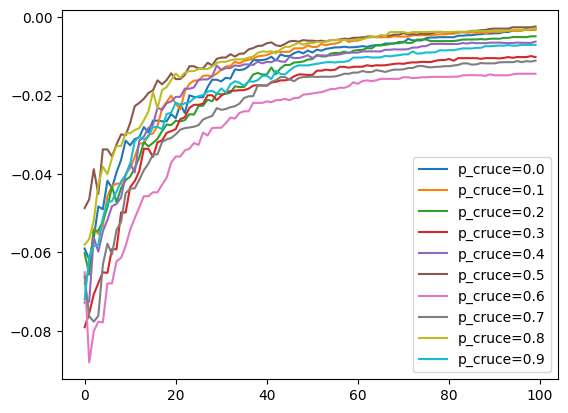

In [5]:
import matplotlib.pyplot as plt

res = []

f = plt.figure()
ax = f.add_subplot(1, 1, 1)  # Create axis to hold the plot

for prob_cruce in range(10):
    num_curules = 50
    num_entidades = 50

    partido_y_curul = np.random.choice(range(1, num_curules + 1), size=num_entidades, p=np.random.dirichlet(np.ones(num_curules)))
    pesos_entidades = np.random.randint(1, 101, num_entidades)

    vd = VerdaderaDemocracia(
        num_partidos=5,
        num_entidades=50,
        tam_poblacion=100,
        prob_cruce= 0.9,
        prob_mutacion= 0.01,
        partido_y_curul =partido_y_curul ,
        pesos_entidades=pesos_entidades
    )

    vd.algoritmo()
    results = vd.results()
    res.append(results)

    ax.plot(results, label=f"p_cruce={prob_cruce/10:.1f}")  # Plot each line

ax.legend()
plt.show()  # Use plt.show() to display and hold the plot


La gráfica muestra la evolución del fitness promedio del mejor individuo por generación, para diferentes valores de probabilidad de cruce (p_cruce) en un algoritmo genético que asigna curules de forma proporcional al poder electoral de las entidades.


*   Eje X (horizontal): Número de generaciones (de 0 a 100)
*   Eje Y (vertical): Valor del fitness (entre -0.07 y 0). Recuerda que el fitness es el negativo del error cuadrático (porque el AG lo maximiza).

Mientras más cercano a 0, mejor es la asignación de curules (más proporcional al poder real).

De la gráfica se puede concluir que
1. Todas las curvas mejoran con las generaciones: El algoritmo aprende progresivamente a hacer mejores asignaciones (el error disminuye).
2. Cruce moderado (p_cruce entre 0.5 y 0.7) tiene mejor rendimiento:
* La curva con p_cruce=0.6 es la que alcanza el mejor fitness (más cercano a 0).
* También se ve que p_cruce=0.7 y p_cruce=0.5 tienen resultados similares.
3. Valores extremos tienen peor rendimiento:
* p_cruce=0.0 (sin cruce): el algoritmo solo muta, y mejora lentamente.
* p_cruce=0.9 y p_cruce=0.8 también muestran comportamiento menos estable (probablemente por demasiada recombinación que rompe soluciones buenas).